In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

Dataset retrieved from [Kaggle](https://www.kaggle.com/venkatasubramanian/credit-eda-case-study/version/2?select=application_data.csv)



In [2]:
path = '/content/drive/MyDrive/msml_651/hw1/'

In [3]:
df = pd.read_csv(path+'application_data.csv')

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [5]:
# dividing the dataframe by genders

df_m = df[df['CODE_GENDER'] == 'M']
df_f = df[df['CODE_GENDER'] == 'F']

# **Scatter plots of incomes by age and gender**

Text(0, 0.5, 'Income in USD')

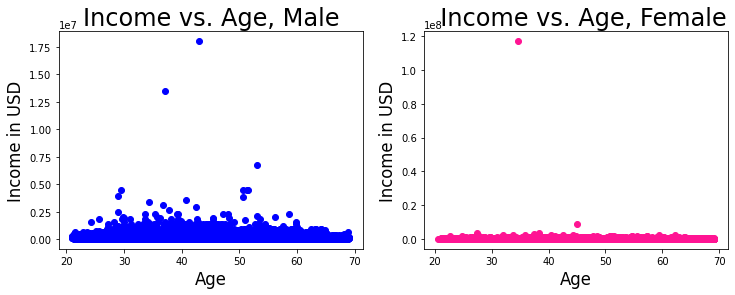

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.scatter(-1*df_m['DAYS_BIRTH']/365, # the given age in the df was in days, converting to yr
            df_m['AMT_INCOME_TOTAL'],color='blue')
ax1.set_title('Income vs. Age, Male',fontsize=24)
ax1.set_xlabel('Age',fontsize=16.5)
ax1.set_ylabel('Income in USD',fontsize=16.5)

ax2.scatter(-1*df_f['DAYS_BIRTH']/365,
            df_f['AMT_INCOME_TOTAL'],color='deeppink')
ax2.set_title('  Income vs. Age, Female',fontsize=24)
ax2.set_xlabel('Age',fontsize=16.5)
ax2.set_ylabel('Income in USD',fontsize=16.5)

The plots above shows there is an "super outlier" on the female plot, which skewed the curve of female incomes, and damaged the interpretability of the plot. Thereofre, this outlier has to be clipped away. 

Text(0, 0.5, 'Income in USD')

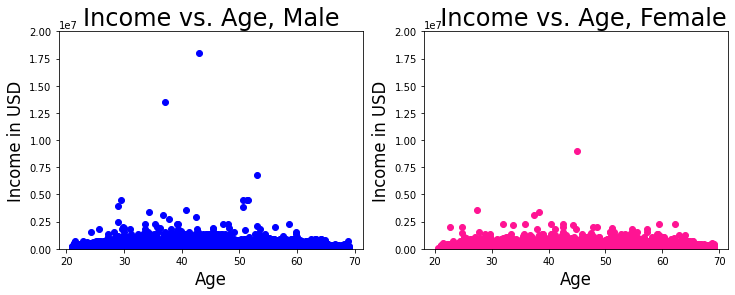

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.scatter(-1*df_m['DAYS_BIRTH']/365,
            df_m['AMT_INCOME_TOTAL'],color='blue')
ax1.set_ylim([0, 2e7])
ax1.set_title('Income vs. Age, Male',fontsize=24)
ax1.set_xlabel('Age',fontsize=16.5)
ax1.set_ylabel('Income in USD',fontsize=16.5)

ax2.scatter(-1*df_f['DAYS_BIRTH']/365,
            df_f['AMT_INCOME_TOTAL'],color='deeppink')
ax2.set_ylim([0, 2e7])
ax2.set_title('  Income vs. Age, Female',fontsize=24)
ax2.set_xlabel('Age',fontsize=16.5)
ax2.set_ylabel('Income in USD',fontsize=16.5)

# **Average incomes and Credit Amounts by genders**

In [68]:
male_meanincome = df_m['AMT_INCOME_TOTAL'].mean()
female_meanincome = df_f['AMT_INCOME_TOTAL'].mean()

male_meancredit = df_m['AMT_CREDIT'].mean()
female_meancredit = df_f['AMT_CREDIT'].mean()

input_data = np.array([[male_meanincome,'income','male'],
                       [male_meancredit,'credit','male'],
                       [female_meanincome,'income','female'],
                       [female_meancredit,'credit','female']])

df_input = pd.DataFrame(data=input_data,
                        columns=['amount','type','gender'])
df_input['amount'] = pd.to_numeric(df_input['amount'])

In [75]:
male_ratio = male_meancredit/male_meanincome
female_ratio = female_meancredit/female_meanincome

ratio_array = np.array([[male_ratio,'Male'],
                       [female_ratio,'Female']])

df_ratio = pd.DataFrame(data=ratio_array,columns=['ratio', 'gender'])
df_ratio['ratio'] = pd.to_numeric(df_ratio['ratio'])

Text(0.5, 1.0, 'Income and Credit per Gender')

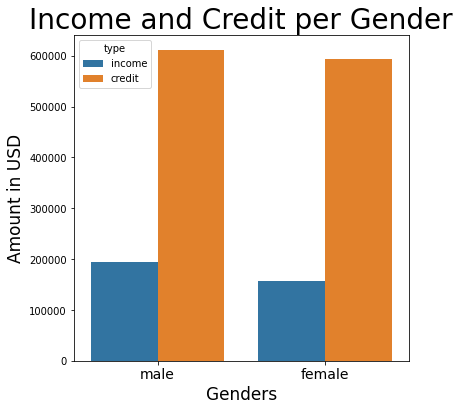

In [73]:
plt.figure(figsize=(6,6))
sbn.barplot(x='gender',
            y='amount',
            hue='type',
            data=df_input)
plt.xlabel('Genders',fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('Amount in USD',fontsize=17)
plt.title('Income and Credit per Gender',fontsize=28)


Text(0.5, 1.0, 'Credit to Income Ratio per Gender')

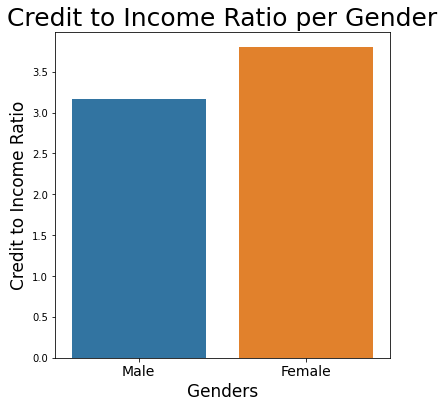

In [76]:
plt.figure(figsize=(6,6))
sbn.barplot(x='gender',
            y='ratio',
            data=df_ratio)
plt.xlabel('Genders',fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('Credit to Income Ratio',fontsize=17)
plt.title('Credit to Income Ratio per Gender',fontsize=25)

# **Education level comparison among genders**

In [92]:
female_edu=df_f['NAME_EDUCATION_TYPE'].value_counts()
female_edu = np.vstack((female_edu.keys(),female_edu.values))

df_female_edu = pd.DataFrame(data=female_edu.T,columns=['edu level','count'])

In [94]:
male_edu=df_m['NAME_EDUCATION_TYPE'].value_counts()
male_edu = np.vstack((male_edu.keys(),male_edu.values))

df_male_edu = pd.DataFrame(data=male_edu.T,columns=['edu level','count'])

In [109]:
colors = sbn.color_palette('bright')[0:len(df_female_edu)]

Text(0.5, 1.0, 'Education Levels of Female')

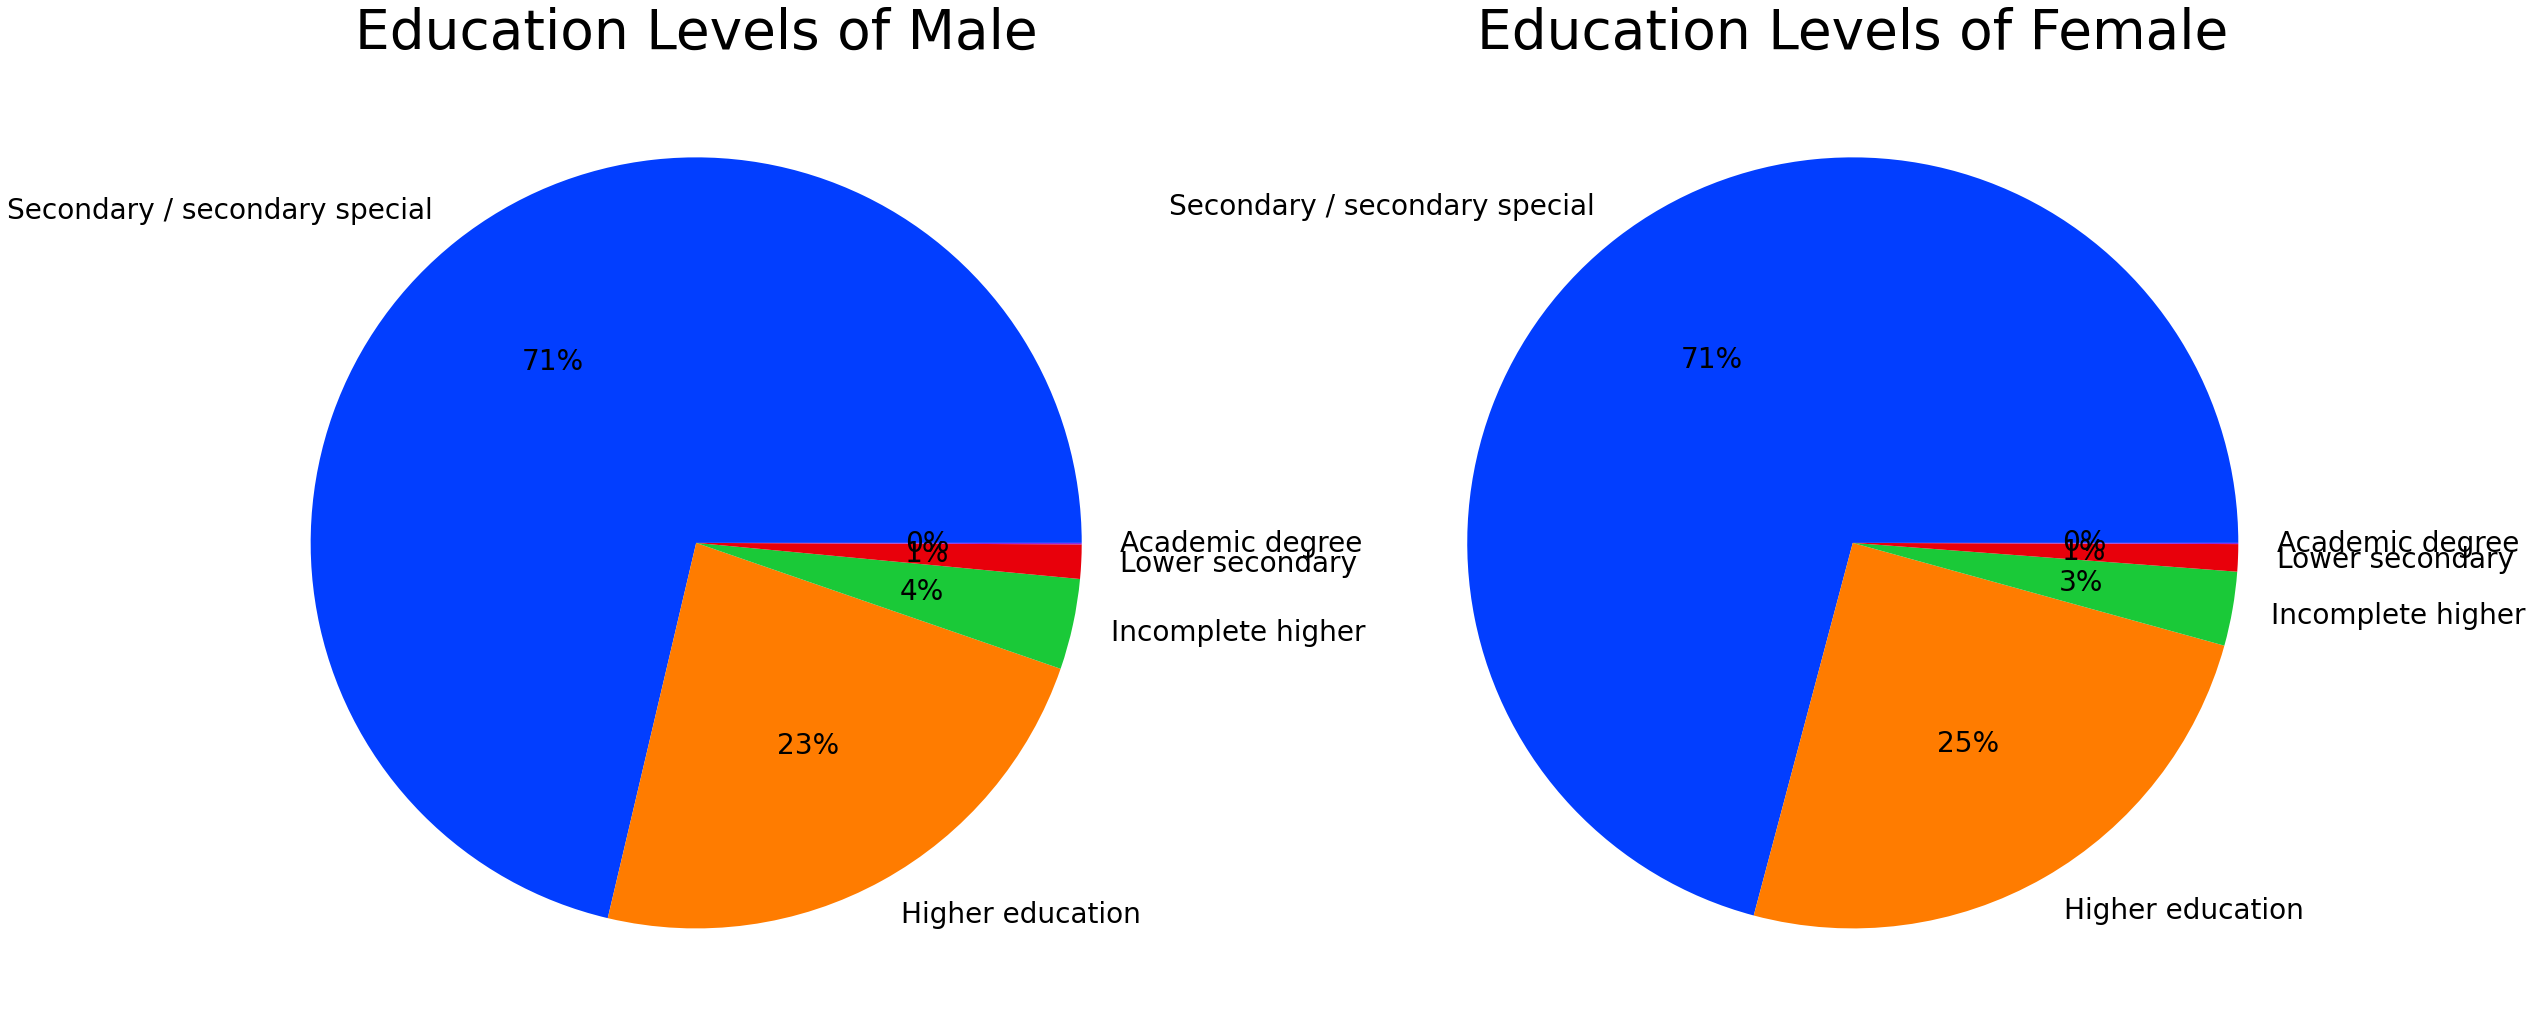

In [115]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(38,25))

ax1.pie(df_male_edu['count'],labels=df_male_edu['edu level'],
        colors=colors, autopct='%.0f%%',
        textprops={'fontsize': 28})
ax1.set_title('Education Levels of Male',fontsize=55)

ax2.pie(df_female_edu['count'],labels=df_female_edu['edu level'],
        colors=colors, autopct='%.0f%%',
        textprops={'fontsize': 28})
ax2.set_title('Education Levels of Female',fontsize=55)

# **Occupation comparison among genders**

In [116]:
female_occ=df_f['OCCUPATION_TYPE'].value_counts()
female_occ = np.vstack((female_occ.keys(),female_occ.values))

df_female_occ = pd.DataFrame(data=female_occ.T,columns=['occupation','count'])

In [118]:
male_occ=df_m['OCCUPATION_TYPE'].value_counts()
male_occ = np.vstack((male_occ.keys(),male_occ.values))

df_male_occ = pd.DataFrame(data=male_occ.T,columns=['occupation','count'])

In [119]:
colors = sbn.color_palette('bright')[0:len(df_female_occ)]

In [125]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(190,90))

ax1.pie(df_male_occ['count'],labels=df_male_occ['occupation'],
        colors=colors, autopct='%.0f%%',
        textprops={'fontsize': 98})
ax1.set_title('Occupation Types of Male',fontsize=200)

ax2.pie(df_female_occ['count'],labels=df_female_occ['occupation'],
        colors=colors, autopct='%.0f%%',
        textprops={'fontsize': 98})
ax2.set_title('Occupation Types of Female',fontsize=200)

Text(0.5, 1.0, 'Occupation Types of Female')